In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

Notebook starts from here

In [ ]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning hadle
warnings.filterwarnings("ignore")

Files

In [ ]:
for dirname, _, filenames in os.walk('D:/'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

Training set

In [ ]:
tr_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bfsi_models_practice/bank_loan_classifier/train_u6lujuX_CVtuZ9i.csv')
print(tr_df.shape)
#print(tr_df.head())

(614, 13)


Testing set

In [ ]:
te_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bfsi_models_practice/bank_loan_classifier/test_Y3wMUE5_7gLdaTN.csv')
print(te_df.shape)
print(te_df.head())

(367, 12)
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3           

Preprocessing of training set

In [ ]:
tr_df.info(verbose=True, null_counts=True)
tr_df.describe()
tr_df.isnull().any() #--nulls are present
print(tr_df.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term

In [ ]:
#--Dropping the loan_id column from both training and test dataset since it is relevant only for the bank
tr_df.drop('Loan_ID', axis=1, inplace=True)
te_df.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
#--Replacing the null values with the most frequent value or mode
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ["Credit_History","Self_Employed","LoanAmount","Dependents","Loan_Amount_Term","Gender","Married"]

for col in null_cols:
  print(f"{col}:\n{tr_df[col].value_counts()}\n","-"*50)
  tr_df[col] = tr_df[col].fillna(tr_df[col].dropna().mode().values[0])
tr_df.isnull().sum().sort_values(ascending=False)

print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
  print(f"{col}:\n{tr_df[col].value_counts()}\n","-"*50)

Before filling missing values

 ################################################## 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype

Data Visualization

In [ ]:
#--List of numerical columns
num = tr_df.select_dtypes('number').columns.to_list()
print(num)
#--List of categorical columns
cat = tr_df.select_dtypes('object').columns.to_list()
print(cat)
#--segregating numberic and categorical dataframes
loan_num = tr_df[num]
loan_cat = tr_df[cat]

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Plotting the data.
Numeric:

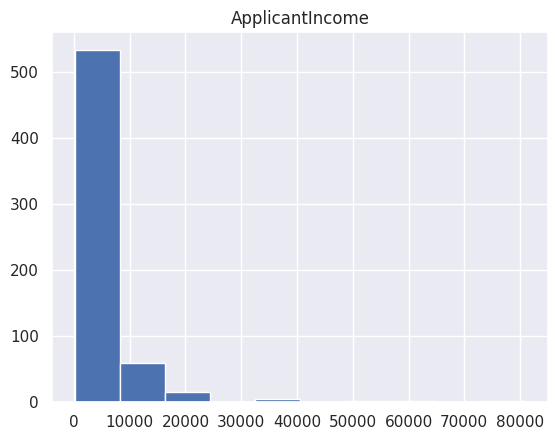

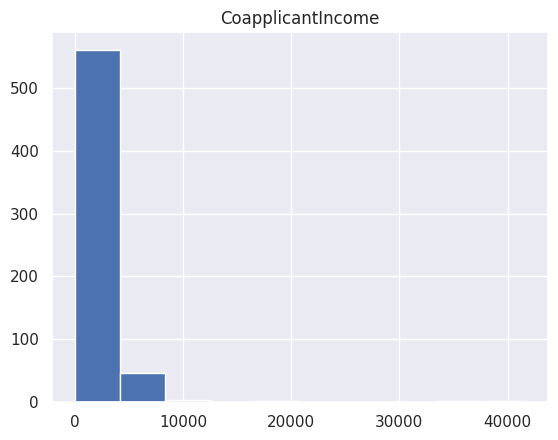

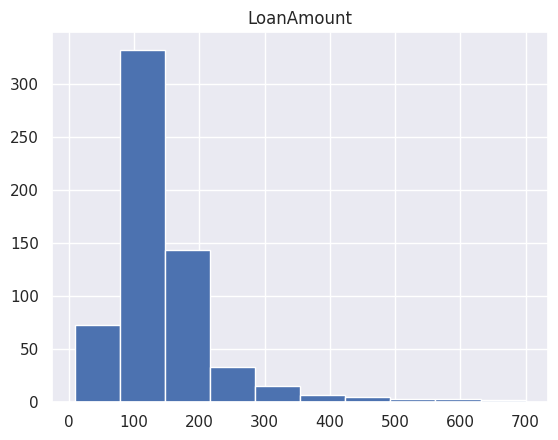

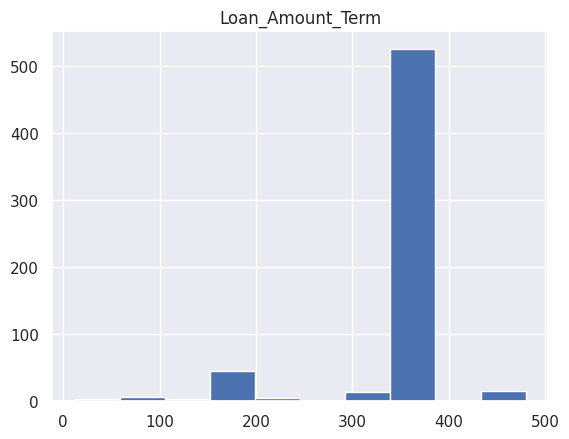

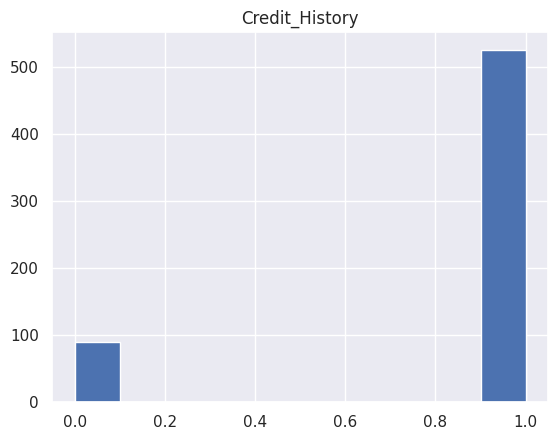

In [ ]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

Categorical plot :

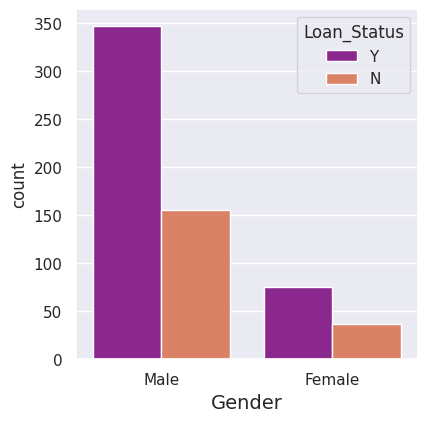

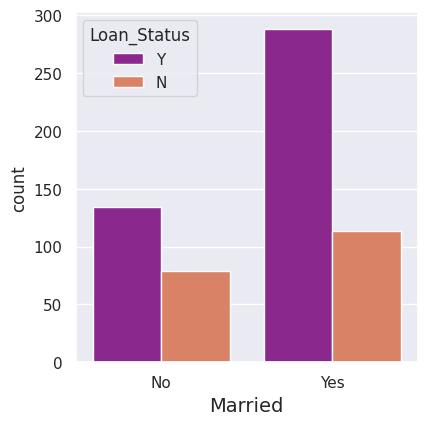

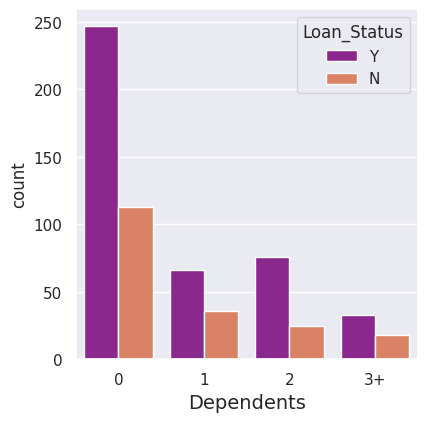

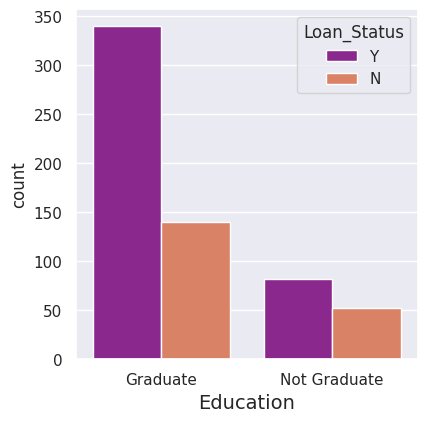

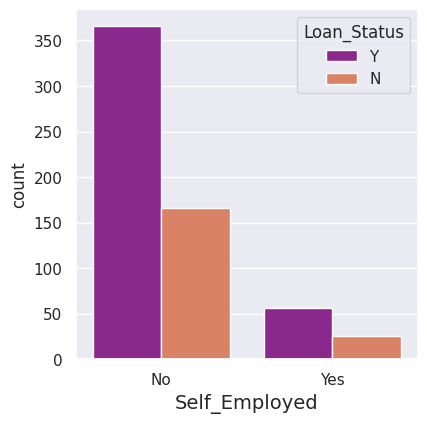

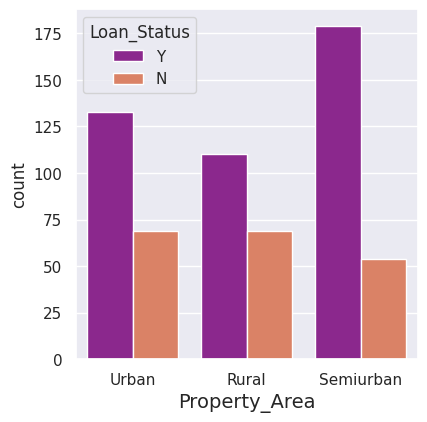

In [ ]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=tr_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

Encoding data to numeric

In [ ]:
#--converting categorical values to numbers
print(np.unique(loan_cat.to_numpy()))

['0' '1' '2' '3+' 'Female' 'Graduate' 'Male' 'N' 'No' 'Not Graduate'
 'Rural' 'Semiurban' 'Urban' 'Y' 'Yes']


In [ ]:
to_numeric = {'Male': 1, 'Female': 2, 'Yes': 1, 'No': 2, 'Graduate': 1, 'Not Graduate': 2, 'Rural' : 1, 'Semiurban' : 2, 'Urban' : 3, 'Y' : 1, 'N' : 0, '3+' : 3}

tr_df = tr_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
te_df = te_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

#converting the dependents column
Dependents_ = pd.to_numeric(tr_df.Dependents)
Dependents__ = pd.to_numeric(te_df.Dependents)

# dropping the previous Dependents column
tr_df.drop(['Dependents'], axis = 1, inplace = True)
te_df.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
tr_df = pd.concat([tr_df, Dependents_], axis = 1)
te_df = pd.concat([te_df, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}\n")
print(tr_df.info(), "\n\n", te_df.info())

training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 column

Checking correlatons between independent and dependent variables

<Axes: >

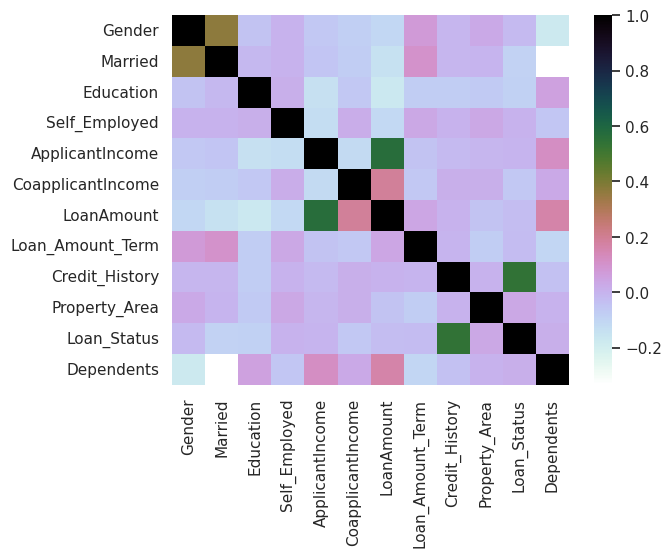

In [ ]:
#--Heatmap
sns.heatmap(tr_df.corr(), cmap = 'cubehelix_r')

In [ ]:
#--Correlation table
tr_df.corr().style.background_gradient(cmap = 'coolwarm').set_precision(2) #--both show highest correlation between loan_status and credit_history

Models building and selection

In [ ]:
#Train test split
X = tr_df.drop("Loan_Status", axis = 1)
y = tr_df["Loan_Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)
#--comparison of accuracy
print(classification_report(y_test, y_predict))
#--Accuracy score
DT_SC = accuracy_score(y_predict, y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

#--Downloading the comparisons
comparison_download = pd.DataFrame({'y_test' : y_test, 'y_predict' : y_predict})
comparison_download.to_csv("Decision Tree.csv")

              precision    recall  f1-score   support

           0       0.49      0.55      0.52        51
           1       0.82      0.78      0.80       134

    accuracy                           0.72       185
   macro avg       0.66      0.67      0.66       185
weighted avg       0.73      0.72      0.72       185

71.89% Accurate


Random Forest

In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
#--comparison of accuracy
print(classification_report(y_test, y_predict))
#--Accuracy score
RF_SC = accuracy_score(y_predict, y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

#--Downloading thr comparisons
comparison_download = pd.DataFrame({'y_test' : y_test, 'y_predict' : y_predict})
comparison_download.to_csv("Random Forest.csv")

              precision    recall  f1-score   support

           0       0.75      0.41      0.53        51
           1       0.81      0.95      0.87       134

    accuracy                           0.80       185
   macro avg       0.78      0.68      0.70       185
weighted avg       0.79      0.80      0.78       185

80.0% Accurate


XGBoost

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_predict = XGB.predict(X_test)
#--comparison of accuracy
print(classification_report(y_test, y_predict))
#--Accuracy score
XGB_SC = accuracy_score(y_predict, y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

#--Downloading thr comparisons
comparison_download = pd.DataFrame({'y_test' : y_test, 'y_predict' : y_predict})
comparison_download.to_csv("XGBoost.csv")

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        51
           1       0.84      0.91      0.87       134

    accuracy                           0.81       185
   macro avg       0.76      0.72      0.74       185
weighted avg       0.80      0.81      0.80       185

80.54% Accurate


Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
#--comparison of accuracy
print(classification_report(y_test, y_predict))
#--Accuracy score
LR_SC = accuracy_score(y_predict, y_test)
print(f"{round(LR_SC*100,2)}% Accurate")

#--Downloading thr comparisons
comparison_download = pd.DataFrame({'y_test' : y_test, 'y_predict' : y_predict})
comparison_download.to_csv("Logistic Regression.csv")

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

83.24% Accurate


Comparison of the accuracy scores confirms that Logistic Regression is the most accurate model

In [ ]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

n_neighbors     Score
3  Logistic Regression  0.832432
2              XGBoost  0.805405
1        Random Forest  0.800000
0        Decision Tree  0.718919